In [11]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\yang\Documents\Downloads\Results_21Mar2022.csv'

df = pd.read_csv(file_path)

df

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,...,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,...,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,...,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,...,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,...,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601,492,female,fish,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie_male_30-39,6.615301,11.385959,13374.38105,18.283800,1.769398,0.482313,641.918305,560.925069,...,6.829520,1.524615,0.269856,610.318478,268.939576,8.510504,1221,male,veggie,30-39
71996,1000,veggie_male_40-49,6.185949,10.566347,12959.68443,17.342092,1.605406,0.446074,580.913591,527.860144,...,6.369390,1.430116,0.252651,570.034533,262.366892,7.988943,961,male,veggie,40-49
71997,1000,veggie_male_50-59,5.871454,9.806539,11924.19092,16.625511,1.468003,0.431966,533.784777,487.176818,...,6.266982,1.381163,0.274705,559.427383,241.645519,7.780208,426,male,veggie,50-59
71998,1000,veggie_male_60-69,5.922496,9.873027,11310.87733,16.531075,1.492114,0.437879,545.453273,487.030916,...,6.240777,1.435583,0.276000,582.000324,244.768887,7.779582,229,male,veggie,60-69


### Prepare data  
In this task, I will pay more attention to the differences between different groups rather than the differences within a certain group.  
so I decided to drop sd_data at the beginning

In [12]:
columns_to_drop = [
    'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
    'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio',
    'sd_watuse', 'sd_acid'
]
df_selected = df.drop(columns=columns_to_drop)
df_selected

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,492,female,fish,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie_male_30-39,6.615301,11.385959,13374.38105,18.283800,1.769398,0.482313,641.918305,560.925069,21.075983,1221,male,veggie,30-39
71996,1000,veggie_male_40-49,6.185949,10.566347,12959.68443,17.342092,1.605406,0.446074,580.913591,527.860144,20.225756,961,male,veggie,40-49
71997,1000,veggie_male_50-59,5.871454,9.806539,11924.19092,16.625511,1.468003,0.431966,533.784777,487.176818,19.625305,426,male,veggie,50-59
71998,1000,veggie_male_60-69,5.922496,9.873027,11310.87733,16.531075,1.492114,0.437879,545.453273,487.030916,19.936478,229,male,veggie,60-69


## Exploratory data analysis  
### Feature Selection

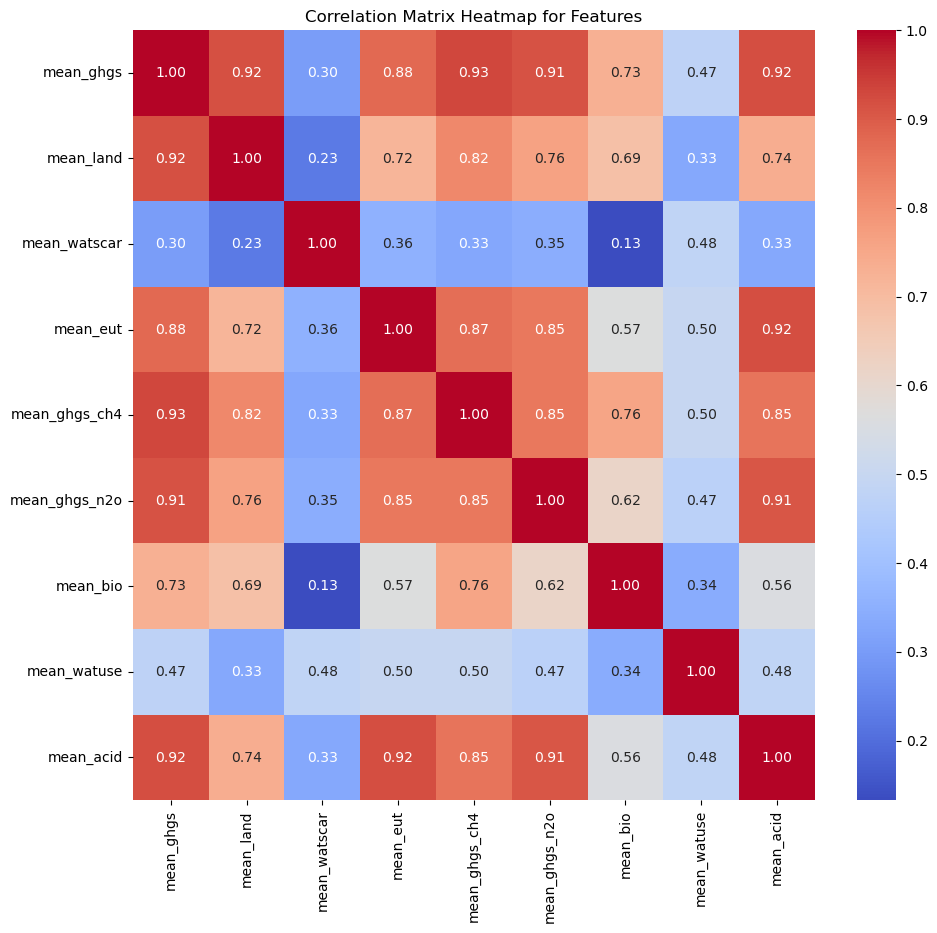

In [13]:
columns_to_drop2 = ["mc_run_id","grouping","n_participants","sex","diet_group","age_group"]
df_features = df_selected.drop(columns=columns_to_drop2)
correlation_matrix = df_features.corr()

# 使用seaborn绘制热力图
plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Features')
plt.show()

**Correlation analysis between featurels**  
Calculate and visualise the correlation between each feature

C:\Users\yang\AppData\Local\Temp\ipykernel_15208\4271270673.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Correlation Strength')


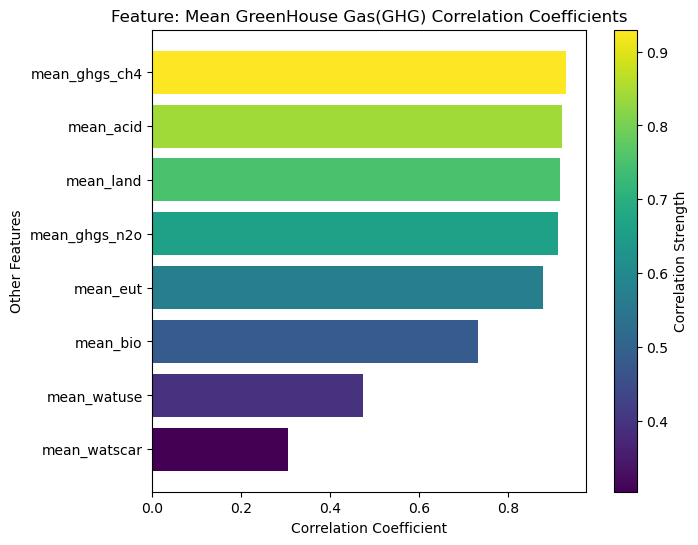

In [14]:
# 分离特征和目标变量
target = 'mean_ghgs'
features = df_features.drop(columns=target)  # 排除目标特征

# 计算特征与mean_ghgs的相关性
feature_target_correlation = features.corrwith(df_selected[target])

# 对相关性进行排序
correlation_sorted = feature_target_correlation.sort_values()

# 为每个相关性值设置颜色
colors = plt.cm.viridis(np.linspace(0, 1, len(correlation_sorted)))

# 设置图形大小
fig, ax = plt.subplots(figsize=(7, 6))

# 绘制水平条形图
for idx, value in enumerate(correlation_sorted):
    ax.barh(idx, value, color=colors[idx])

# 设置y轴刻度和标签
plt.yticks(range(len(correlation_sorted)), correlation_sorted.index)

# 设置图形标题和坐标轴标签
plt.title('Feature: Mean GreenHouse Gas(GHG) Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Other Features')

# 创建颜色条映射
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=correlation_sorted.min(), vmax=correlation_sorted.max()))
sm.set_array([])
plt.colorbar(sm, label='Correlation Strength')

# 显示图形
plt.show()

Sort correlation coefficients by absolute value.  
If the absolute value of the correlation coefficient is more than **0.85**, we consider they are strongly related.  
Therefore, retaining the mean_ghgs features is sufficient to replace them

C:\Users\yang\AppData\Local\Temp\ipykernel_15208\1528449804.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Correlation Strength')


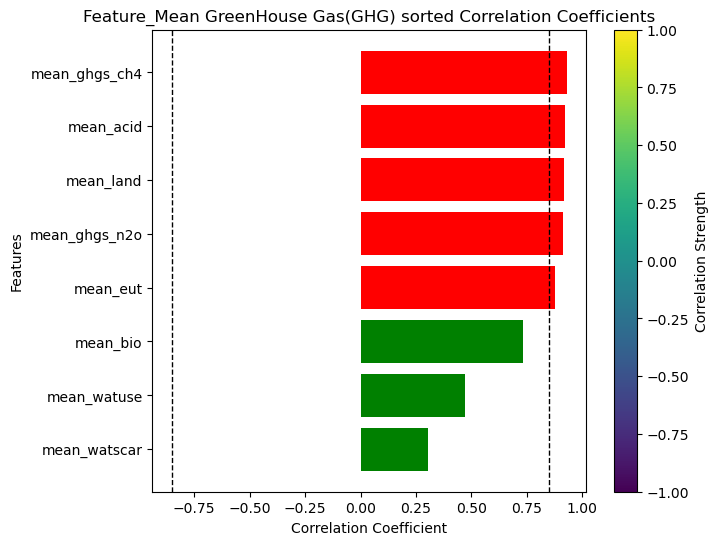

In [15]:
# 对相关性进行绝对值排序，但保留正负符号
correlation_sorted_abs = correlation_sorted.abs().sort_values(ascending=True)
correlation_sorted_by_abs = correlation_sorted[correlation_sorted_abs.index]

plt.figure(figsize=(7, 6))

# 设置阈值并为低于阈值的条形设定不同的颜色
threshold = 0.85
for idx, (feature, value) in enumerate(correlation_sorted_by_abs.items()):
    color = 'green' if abs(value) < threshold else 'red'
    plt.barh(idx, value, color=color)

plt.yticks(range(len(correlation_sorted_by_abs)), correlation_sorted_by_abs.index)
plt.title('Feature_Mean GreenHouse Gas(GHG) sorted Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# 添加阈值指示线
plt.axvline(x=threshold, color='black', linestyle='--', lw=1)
plt.axvline(x=-threshold, color='black', linestyle='--', lw=1)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
plt.colorbar(sm, label='Correlation Strength')

plt.show()


**Visualize the selection process**

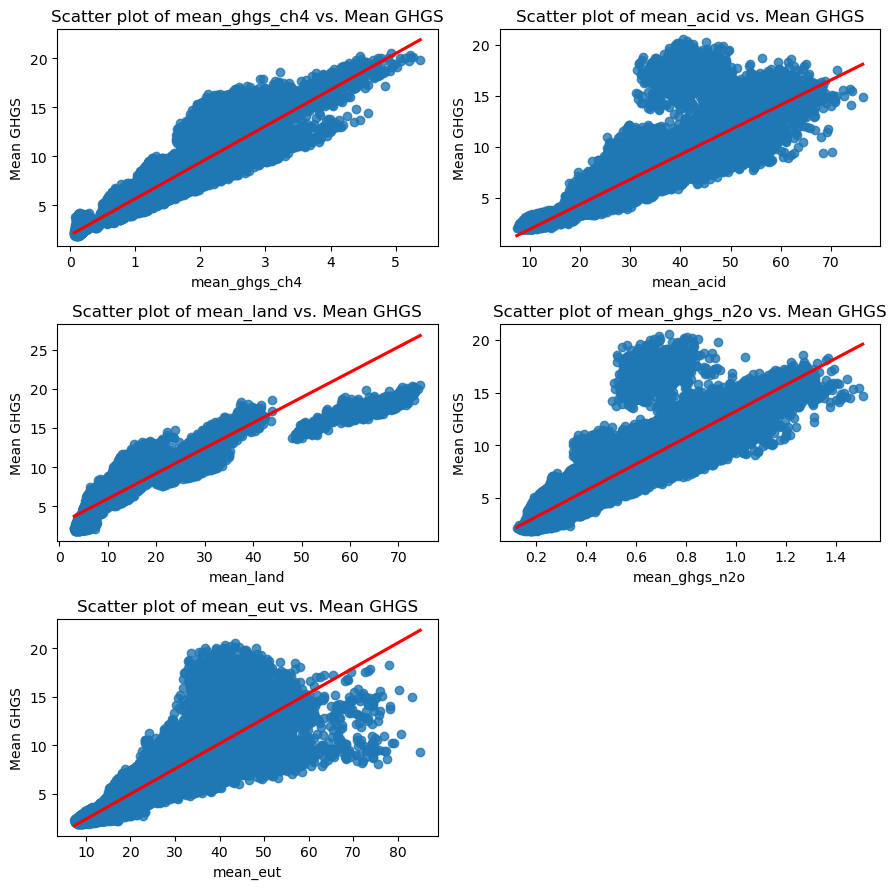

In [16]:
correlation_sorted_abs = correlation_sorted.abs().sort_values(ascending=False)
correlation_sorted_by_abs = correlation_sorted[correlation_sorted_abs.index]

# get 5 sorted highest_correlation_features
highest_correlation_features = correlation_sorted_by_abs.head(5).index

n_features = len(highest_correlation_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 9))
axes = axes.flatten()

for i, feature in enumerate(highest_correlation_features):
    sns.regplot(x=feature, y='mean_ghgs', data=df_selected, ax=axes[i], line_kws={'color': 'red'}, ci=90)
    axes[i].set_title(f'Scatter plot of {feature} vs. Mean GHGS')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean GHGS')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

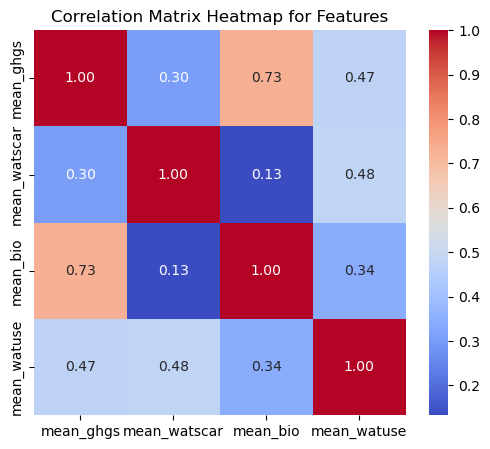

In [17]:
columns_to_drop3 = ["mean_ghgs_ch4","mean_ghgs_n2o","mean_land","mean_eut","mean_acid"]
df_after_selection = df_features.drop(columns=columns_to_drop3)
correlation_matrix = df_after_selection.corr()
# 
# 使用seaborn绘制热力图
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Features')
plt.show()

In [18]:
# 从df_selected中选择被移除的非特征列
columns_to_add_back = ["grouping", "sex", "diet_group", "age_group"]
df_non_features = df_selected[columns_to_add_back]

# 将这些列合并回df_after_selection来创建df_final
df_final = pd.concat([df_after_selection, df_non_features], axis=1)
df_final

,mean_ghgs,mean_watscar,mean_bio,mean_watuse,grouping,sex,diet_group,age_group
0,5.421821,14165.86240,476.270413,679.923479,fish_female_20-29,female,fish,20-29
1,5.436673,15222.77063,467.923201,709.343785,fish_female_30-39,female,fish,30-39
2,5.289333,15818.80068,438.659832,707.925368,fish_female_40-49,female,fish,40-49
3,5.169020,16962.06009,395.787622,720.825105,fish_female_50-59,female,fish,50-59
4,5.380268,18212.66232,421.176867,749.392826,fish_female_60-69,female,fish,60-69
...,...,...,...,...,...,...,...,...
71995,6.615301,13374.38105,641.918305,560.925069,veggie_male_30-39,male,veggie,30-39
71996,6.185949,12959.68443,580.913591,527.860144,veggie_male_40-49,male,veggie,40-49
71997,5.871454,11924.19092,533.784777,487.176818,veggie_male_50-59,male,veggie,50-59
71998,5.922496,11310.87733,545.453273,487.030916,veggie_male_60-69,male,veggie,60-69


### First try PCA

In [62]:
# 选择数值型特征进行PCA
numerical_features = df_final.select_dtypes(include=[np.number])

# 标准化数据
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# 应用PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_features_scaled)

# # 将主成分结果转换为DataFrame
# pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# # 将grouping信息添加到PCA结果中用于绘图
# pca_df['grouping'] = df_final['grouping']

# # 绘制散点图
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='grouping', data=pca_df, palette="viridis")
# plt.title('PCA Result of df_final')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Grouping', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

# 打印解释的方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)
# 获取主成分的载荷
loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=numerical_features.columns)

# 打印载荷
print("Loadings of principal components:")
print(loadings)

Explained variance ratio: [0.56514577 0.25431814]
Loadings of principal components:
              Principal Component 1  Principal Component 2
mean_ghgs                  0.579372              -0.309782
mean_watscar               0.385816               0.694856
mean_bio                   0.512510              -0.534312
mean_watuse                0.502799               0.368404


### Inspired by PCA loadings  
Compared to the principal components of PCA which are not **explanatory**  
This is actually we can create two axes, one axis represents water resources, and the other axis represents greenhouse gases and biodiversity

### Deal with 'mean_ghgs' and  'mean_bio'

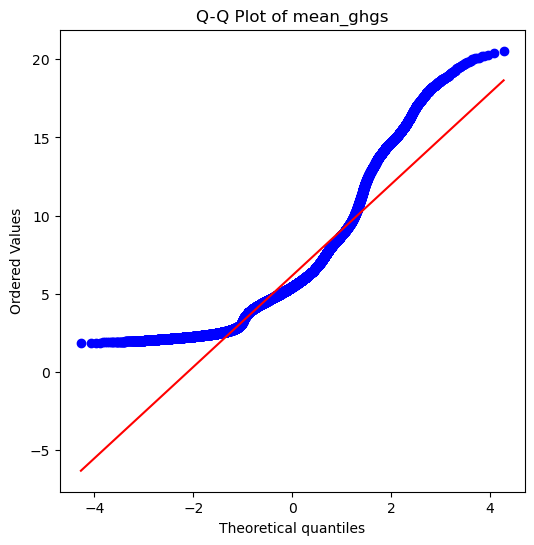

In [22]:
import scipy.stats as stats
z_scores = stats.zscore(df_final['mean_ghgs'])
# 生成与样本同样大小的正态分布数据
theoretical_qq = np.sort(stats.norm.rvs(size=len(df_final['mean_ghgs'])))
# 绘制Q-Q图
plt.figure(figsize=(6,6))
stats.probplot(df_final['mean_ghgs'], dist="norm", plot=plt)
plt.title('Q-Q Plot of mean_ghgs')
plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# 选择这两个特征进行PCA
ghg_bio_features = df_after_selection[['mean_ghgs', 'mean_bio']]

# 创建MinMaxScaler实例进行最大-最小标准化
min_max_scaler = MinMaxScaler()

# 标准化这两个特征
ghg_bio_scaled = min_max_scaler.fit_transform(ghg_bio_features)

# 应用PCA，降至1维
pca = PCA(n_components=1)
ghg_bio_pca = pca.fit_transform(ghg_bio_scaled)

# 保存PCA结果为X轴
x_axis = ghg_bio_pca.flatten()

# 主成分占比
explained_variance_ratio = pca.explained_variance_ratio_[0]

# Loading scores
loading_scores = pca.components_[0]

# 打印主成分占比和loading分数
print("Explained variance ratio (component 1):", explained_variance_ratio)
print("Loading scores for component 1:", loading_scores)

Explained variance ratio (component 1): 0.8841288901188977
Loading scores for component 1: [0.85038861 0.52615513]


### Deal with 'mean_watscar' and 'mean_watuse'

In [29]:
from scipy.stats import pearsonr

corr_test = pearsonr(df_after_selection['mean_watscar'], df_after_selection['mean_watuse'])
print(f"Pearson correlation test result: Correlation = {corr_test[0]}, p-value = {corr_test[1]}")

Pearson correlation test result: Correlation = 0.48121784246750215, p-value = 0.0


In [30]:
import pingouin as pg
p_corr = pg.partial_corr(data=df_after_selection, x='mean_watscar', y='mean_watuse', 
                         covar=['mean_ghgs', 'mean_bio'])

p_corr

,n,r,CI95%,p-val
pearson,72000,0.40426,"[0.4, 0.41]",0.0


After controlling mean_ghgs and mean_bio, the partial correlation coefficient is still **0.40426**

In [31]:
inverse_correlation_weight = 1 - 0.40426

# 假设我们给mean_watscar和mean_watuse相同的逆权重
weight_watscar = weight_watuse = inverse_correlation_weight / 2

# 构建Y轴
y_axis = weight_watscar * df_after_selection['mean_watscar'] + weight_watuse * df_after_selection['mean_watuse']

In [34]:
from sklearn.preprocessing import MinMaxScaler

# 假设df_after_selection已经定义，并且包含mean_watscar和mean_watuse
# 选择这两个水资源相关特征
water_features = df_after_selection[['mean_watscar', 'mean_watuse']]

# 创建MinMaxScaler实例进行最大-最小标准化
min_max_scaler = MinMaxScaler()

# 标准化这两个特征
water_scaled = min_max_scaler.fit_transform(water_features)

# 假设weight_watscar和weight_watuse是之前计算好的逆相关性权重
# 用之前计算的逆相关性权重来结合标准化后的水资源特征
y_axis = (water_scaled[:, 0] * weight_watscar + water_scaled[:, 1] * weight_watuse)
y_axis

array([0.09532643, 0.10416398, 0.10743963, ..., 0.06421909, 0.06069617,
       0.06280708])

In [46]:
min_max_scaler = MinMaxScaler(feature_range=(0, 10))
x_axis_scaled = min_max_scaler.fit_transform(ghg_bio_pca).flatten()

# 对y_axis进行0到10的缩放
min_max_scaler = MinMaxScaler(feature_range=(0, 10))
y_axis_scaled = min_max_scaler.fit_transform(y_axis.reshape(-1, 1)).flatten()

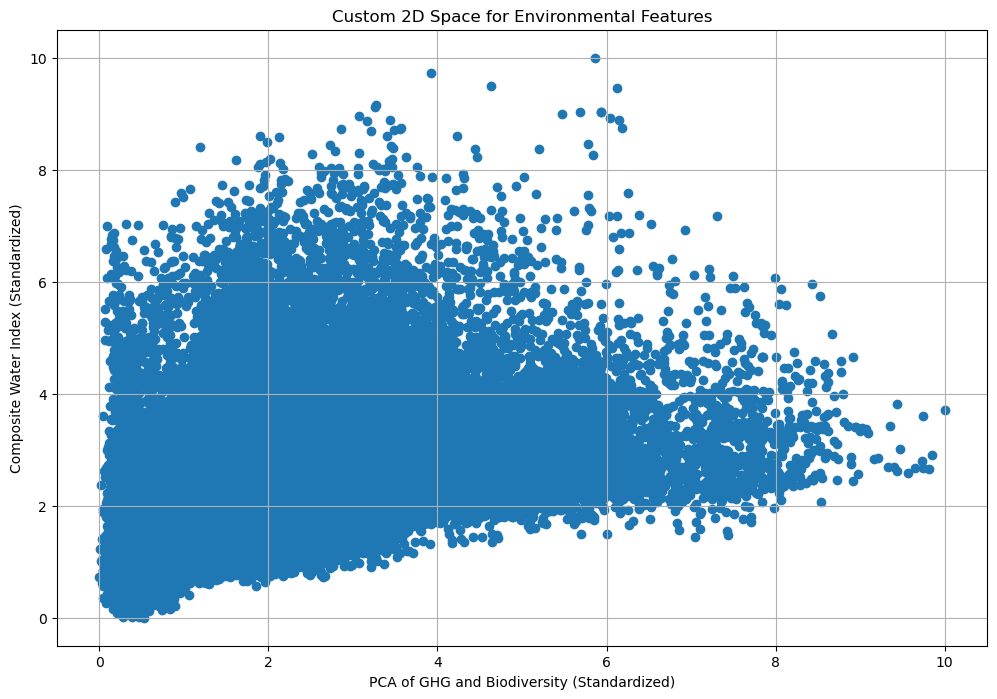

In [47]:
import matplotlib.pyplot as plt

# 创建散点图
plt.figure(figsize=(12, 8))
plt.scatter(x_axis_scaled, y_axis_scaled)
plt.title('Custom 2D Space for Environmental Features')
plt.xlabel('PCA of GHG and Biodiversity (Standardized)')
plt.ylabel('Composite Water Index (Standardized)')
plt.grid(True)
plt.show()


In [53]:
# 创建包含新特征和原始分类特征的DataFrame
df_transformed = pd.DataFrame({
    'PCA_GHG_Bio': x_axis_scaled,  # 新的PCA特征
    'Composite_Water':  y_axis_scaled,  # 新的水资源综合特征
    'grouping': df_selected['grouping'],  # 原始分类特征
    'sex': df_selected['sex'],
    'diet_group': df_selected['diet_group'],
    'age_group': df_selected['age_group']
})

# 将新DataFrame保存为CSV文件
# df_transformed.to_csv('transformed_0_10_data.csv', index=False)
df_transformed.to_csv('transformed_0_10_beau_data.csv', index=False, float_format='%.3f')

df_transformed.head()

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,2.391977,1.913913,fish_female_20-29,female,fish,20-29
1,2.373160,2.092363,fish_female_30-39,female,fish,30-39
2,2.239470,2.158506,fish_female_40-49,female,fish,40-49
3,2.076057,2.315292,fish_female_50-59,female,fish,50-59
4,2.220378,2.514486,fish_female_60-69,female,fish,60-69


In [122]:
# 设置每个grouping类别要抽取的样本数
samples_per_group = 50

# 使用groupby和sample对每个类别进行抽样
sampled_df = df_transformed.groupby('grouping').apply(lambda x: x.sample(n=samples_per_group, random_state=1)).reset_index(drop=True)

# 现在sampled_df包含了随机抽样的数据
sampled_df

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,0.758879,1.005454,fish_female_20-29,female,fish,20-29
1,1.733402,2.122837,fish_female_20-29,female,fish,20-29
2,3.208844,2.260872,fish_female_20-29,female,fish,20-29
3,1.259611,2.303869,fish_female_20-29,female,fish,20-29
4,2.195169,1.864416,fish_female_20-29,female,fish,20-29
...,...,...,...,...,...,...
3595,1.059646,1.664454,veggie_male_70-79,male,veggie,70-79
3596,1.144299,2.434696,veggie_male_70-79,male,veggie,70-79
3597,2.457458,2.104253,veggie_male_70-79,male,veggie,70-79
3598,1.596497,1.212463,veggie_male_70-79,male,veggie,70-79


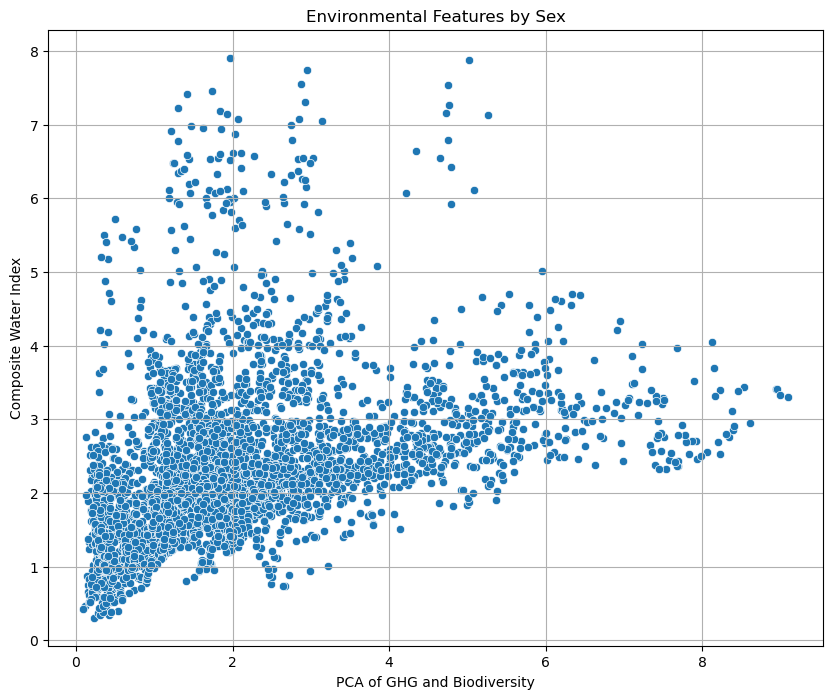

In [123]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_df, x='PCA_GHG_Bio', y='Composite_Water')

# 添加图例和标题
plt.title('Environmental Features by Sex')
plt.xlabel('PCA of GHG and Biodiversity')
plt.ylabel('Composite Water Index')
plt.grid(True)
plt.show()

# Finding 2

In [10]:
# 根据grouping特征进行分组，并计算平均值
features_to_average = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
]
grouped_data = df_selected.groupby('grouping')[features_to_average].mean()

# 重置索引，使DataFrame格式更加整洁
grouped_data = grouped_data.reset_index()
grouped_data

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid
0,fish_female_20-29,4.902947,6.489031,17131.963352,20.985464,0.842864,0.322486,248.135212,759.237211,22.770956
1,fish_female_30-39,4.942664,6.515886,17652.628540,20.948442,0.836500,0.321971,249.827684,759.629613,23.257771
2,fish_female_40-49,4.927040,6.540682,17729.964756,20.713798,0.841106,0.320413,252.846922,748.488755,23.470170
3,fish_female_50-59,4.944320,6.566172,18446.193259,20.989284,0.834881,0.323892,246.789912,788.932276,23.652474
4,fish_female_60-69,5.103823,6.866635,18922.366831,21.569322,0.879670,0.336023,258.645759,819.856604,24.455240
...,...,...,...,...,...,...,...,...,...,...
67,veggie_male_30-39,4.807758,6.787163,16603.476202,18.988080,0.811991,0.316326,266.148897,594.307015,22.864091
68,veggie_male_40-49,4.610379,6.610474,16477.661724,18.275813,0.764687,0.304605,251.351926,576.240665,21.866199
69,veggie_male_50-59,4.455095,6.522068,16333.409315,17.619071,0.733031,0.299523,244.248429,559.640001,21.186608
70,veggie_male_60-69,4.444844,6.628730,16725.207750,17.543012,0.738550,0.305724,248.603854,566.825960,21.321332


Explained variance ratio: [0.95265284]


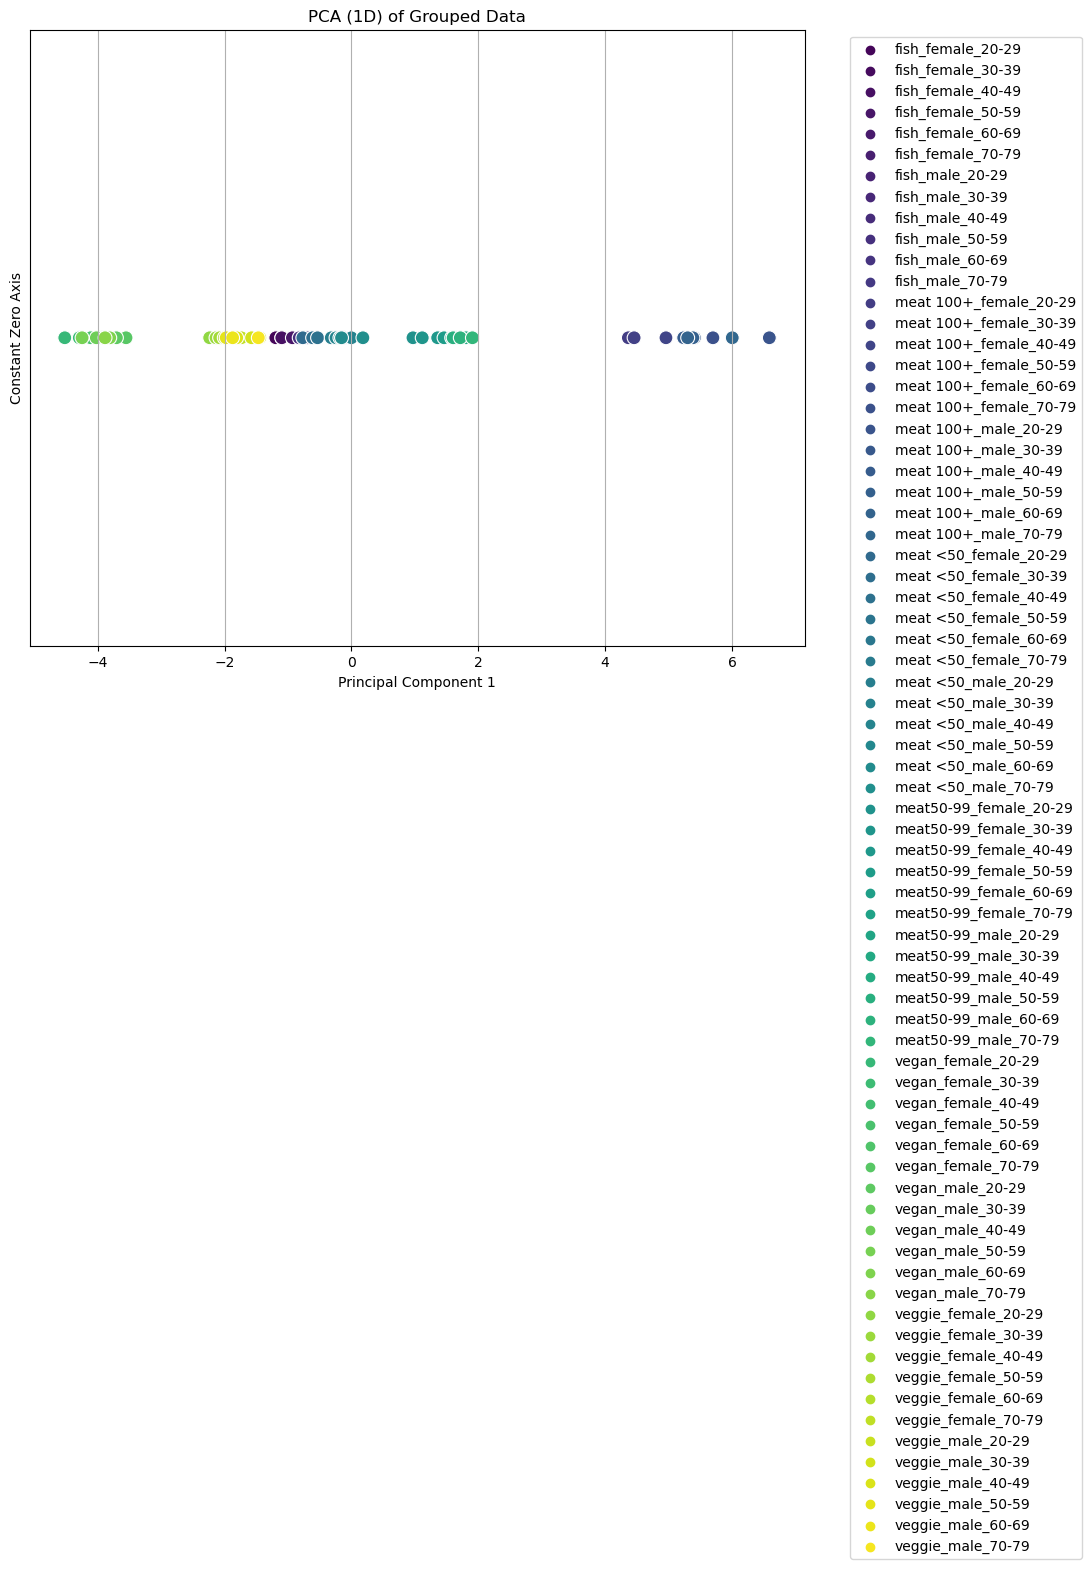

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 确保数据没有非数值列
grouped_data_numeric = grouped_data.select_dtypes(include=[np.number])

# 标准化数据
scaler = StandardScaler()
grouped_data_scaled = scaler.fit_transform(grouped_data_numeric)

# 应用PCA，降至1维
pca = PCA(n_components=1)
principal_component_1d = pca.fit_transform(grouped_data_scaled)

# 将主成分转换为DataFrame，并添加grouping列
pca_df_1d = pd.DataFrame(data=principal_component_1d, columns=['Principal Component 1'])
pca_df_1d['grouping'] = grouped_data['grouping']  # 确保grouping列与数据对应

# 展示主成分解释的方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 绘制散点图，使用grouping信息标记每个点
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y=[0]*len(pca_df_1d), hue='grouping', data=pca_df_1d, palette="viridis", s=100)
plt.title('PCA (1D) of Grouped Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Constant Zero Axis')
plt.yticks([])  # 隐藏y轴，因为1维数据在y轴没有意义
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放置在图外
plt.show()

In [17]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1'], index=grouped_data_numeric.columns)
print(loadings)

                    PC1
mean_ghgs      0.340114
mean_land      0.328403
mean_watscar   0.327388
mean_eut       0.340080
mean_ghgs_ch4  0.339504
mean_ghgs_n2o  0.336228
mean_bio       0.332901
mean_watuse    0.314048
mean_acid      0.340404


In [19]:
# 计算标准差
std_dev = grouped_data['some_feature_std'].values  # 替换'some_feature_std'为相应的标准差列名

# 添加抖动
jitter = np.random.normal(0, 0.1, size=len(pca_df_1d))
pca_df_1d['Jittered Component 1'] = pca_df_1d['Principal Component 1'] + jitter

# 绘制带误差条的散点图
plt.figure(figsize=(10, 8))
for i, (pc, err, jt) in enumerate(zip(pca_df_1d['Principal Component 1'], std_dev, pca_df_1d['Jittered Component 1'])):
    plt.errorbar(pc, 0, xerr=err, fmt='o', color='blue', alpha=0.5)
    plt.scatter(pc, jt, color='red', alpha=0.5)  # 使用红色标记实际点位置

plt.title('PCA (1D) of Grouped Data with Error Bars')
plt.xlabel('Principal Component 1 with Jitter')
plt.ylabel('Jitter Axis')
plt.grid(True)
plt.show()

KeyError: 'Principal Component 1'

## Edit scale

In [79]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\yang\transformed_0_10_beau_data.csv'

df1 = pd.read_csv(file_path)

df1

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,2.392,1.914,fish_female_20-29,female,fish,20-29
1,2.373,2.092,fish_female_30-39,female,fish,30-39
2,2.239,2.159,fish_female_40-49,female,fish,40-49
3,2.076,2.315,fish_female_50-59,female,fish,50-59
4,2.220,2.514,fish_female_60-69,female,fish,60-69
...,...,...,...,...,...,...
71995,3.271,1.595,veggie_male_30-39,male,veggie,30-39
71996,2.951,1.483,veggie_male_40-49,male,veggie,40-49
71997,2.709,1.286,veggie_male_50-59,male,veggie,50-59
71998,2.760,1.215,veggie_male_60-69,male,veggie,60-69


In [66]:
# 计算不同sex和diet_group下的PCA_GHG_Bio平均数
averages = df.groupby(['sex', 'diet_group'])['PCA_GHG_Bio'].mean()
std = df.groupby(['sex', 'diet_group'])['PCA_GHG_Bio'].std()
# 打印结果
print(averages)
std

sex     diet_group
female  fish          1.598681
        meat          2.589289
        meat100       4.158473
        meat50        1.869990
        vegan         0.427957
        veggie        1.395871
male    fish          1.737791
        meat          2.743515
        meat100       4.393487
        meat50        2.004757
        vegan         0.435955
        veggie        1.497202
Name: PCA_GHG_Bio, dtype: float64


sex     diet_group
female  fish          0.547078
        meat          0.729083
        meat100       1.426065
        meat50        0.569783
        vegan         0.200668
        veggie        0.553912
male    fish          0.566508
        meat          0.753020
        meat100       1.392614
        meat50        0.588412
        vegan         0.195779
        veggie        0.560237
Name: PCA_GHG_Bio, dtype: float64

In [67]:
averages = df.groupby([ 'diet_group'])['PCA_GHG_Bio'].mean()
std = df.groupby([ 'diet_group'])['PCA_GHG_Bio'].std()
# 打印结果
print(averages)
std

diet_group
fish       1.668236
meat       2.666402
meat100    4.275980
meat50     1.937373
vegan      0.431956
veggie     1.446536
Name: PCA_GHG_Bio, dtype: float64


diet_group
fish       0.561182
meat       0.745118
meat100    1.414270
meat50     0.583055
vegan      0.198271
veggie     0.559360
Name: PCA_GHG_Bio, dtype: float64

In [68]:
averages = pd.Series({
    'fish': 1.668236,
    'meat': 2.666402,
    'meat100': 4.275980,
    'meat50': 1.937373,
    'vegan': 0.431956,
    'veggie': 1.446536
})

std = pd.Series({
    'fish': 0.561182,
    'meat': 0.745118,
    'meat100': 1.414270,
    'meat50': 0.583055,
    'vegan': 0.198271,
    'veggie': 0.559360
})

# 计算每个组+和-一个标准差之后的值
mean_plus_std = averages + std
mean_minus_std = averages - std

# 打印计算结果
print("Mean + 1 Std:\n", mean_plus_std)
print("Mean - 1 Std:\n", mean_minus_std)

Mean + 1 Std:
 fish       2.229418
meat       3.411520
meat100    5.690250
meat50     2.520428
vegan      0.630227
veggie     2.005896
dtype: float64
Mean - 1 Std:
 fish       1.107054
meat       1.921284
meat100    2.861710
meat50     1.354318
vegan      0.233685
veggie     0.887176
dtype: float64


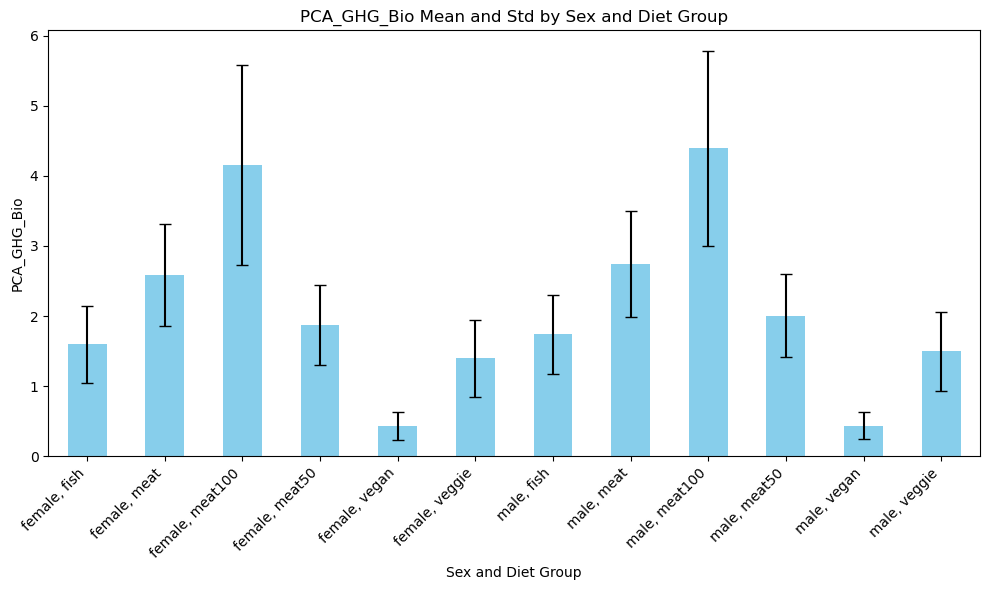

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 构建数据
data = {
    'Mean': [1.598681, 2.589289, 4.158473, 1.869990, 0.427957, 1.395871,
             1.737791, 2.743515, 4.393487, 2.004757, 0.435955, 1.497202],
    'Std': [0.547078, 0.729083, 1.426065, 0.569783, 0.200668, 0.553912,
            0.566508, 0.753020, 1.392614, 0.588412, 0.195779, 0.560237]
}

index = pd.MultiIndex.from_product([['female', 'male'], 
                                    ['fish', 'meat', 'meat100', 'meat50', 'vegan', 'veggie']],
                                   names=['sex', 'diet_group'])

df = pd.DataFrame(data, index=index)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
df['Mean'].plot(kind='bar', yerr=df['Std'], ax=ax, capsize=4, color='skyblue')

# 设置图表标题和标签
ax.set_title('PCA_GHG_Bio Mean and Std by Sex and Diet Group')
ax.set_xlabel('Sex and Diet Group')
ax.set_ylabel('PCA_GHG_Bio')

# 优化x轴标签显示
ax.set_xticklabels([f'{sex}, {diet}' for sex, diet in df.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()


## For Water Score


In [69]:
# 计算不同sex和diet_group下的PCA_GHG_Bio平均数
averages = df.groupby(['sex', 'diet_group'])['Composite_Water'].mean()
std = df.groupby(['sex', 'diet_group'])['Composite_Water'].std()
# 打印结果
print(averages)
std

sex     diet_group
female  fish          2.563311
        meat          2.830737
        meat100       3.377618
        meat50        2.502623
        vegan         1.560480
        veggie        1.898865
male    fish          2.735524
        meat          2.884348
        meat100       3.502528
        meat50        2.561001
        vegan         1.651668
        veggie        2.037713
Name: Composite_Water, dtype: float64


sex     diet_group
female  fish          0.919598
        meat          0.974206
        meat100       1.031989
        meat50        0.902346
        vegan         0.870803
        veggie        0.752574
male    fish          0.981235
        meat          0.945869
        meat100       1.021234
        meat50        0.893914
        vegan         0.918719
        veggie        0.804217
Name: Composite_Water, dtype: float64

In [70]:
averages = df.groupby([ 'diet_group'])['Composite_Water'].mean()
std = df.groupby([ 'diet_group'])['Composite_Water'].std()
# 打印结果
print(averages)
std

diet_group
fish       2.649417
meat       2.857543
meat100    3.440073
meat50     2.531812
vegan      1.606075
veggie     1.968289
Name: Composite_Water, dtype: float64


diet_group
fish       0.954767
meat       0.960476
meat100    1.028481
meat50     0.898577
vegan      0.896205
veggie     0.781880
Name: Composite_Water, dtype: float64

In [71]:
averages = {
    'fish': 2.6494,
    'meat': 2.8575,
    'meat100': 3.4401,
    'meat50': 2.5318,
    'vegan': 1.6061,
    'veggie': 1.9683
}

std_devs = {
    'fish': 0.9548,
    'meat': 0.9605,
    'meat100': 1.0285,
    'meat50': 0.8986,
    'vegan': 0.8962,
    'veggie': 0.7819
}

# 计算平均值±标准差
result_plus_std = {diet: round(averages[diet] + std_devs[diet], 4) for diet in averages}
result_minus_std = {diet: round(averages[diet] - std_devs[diet], 4) for diet in averages}

result_plus_std, result_minus_std

({'fish': 3.6042,
  'meat': 3.818,
  'meat100': 4.4686,
  'meat50': 3.4304,
  'vegan': 2.5023,
  'veggie': 2.7502},
 {'fish': 1.6946,
  'meat': 1.897,
  'meat100': 2.4116,
  'meat50': 1.6332,
  'vegan': 0.7099,
  'veggie': 1.1864})

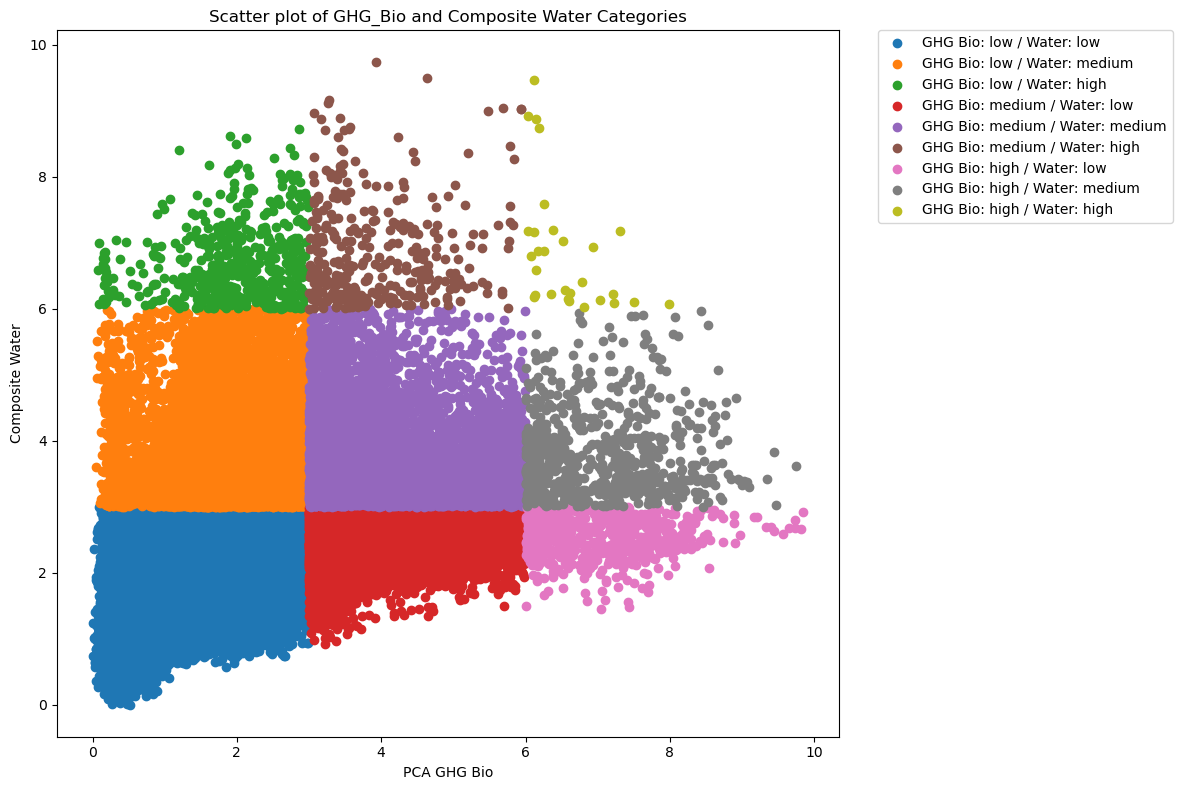

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
# df1 = pd.read_csv(file_path)

# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], right=False)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], right=False)

# 创建散点图
plt.figure(figsize=(12, 8))  # 调整画布大小以适应图例
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        plt.scatter(subset['PCA_GHG_Bio'], subset['Composite_Water'], label=f'GHG Bio: {x_label} / Water: {y_label}')

# 添加标题和标签
plt.title('Scatter plot of GHG_Bio and Composite Water Categories')
plt.xlabel('PCA GHG Bio')
plt.ylabel('Composite Water')

# 添加图例，把它放到图形的右侧
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# 调整子图参数或使用tight_layout自动调整，以防止图例和标签被剪切
plt.tight_layout()

# 显示图表
plt.show()


In [181]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 初始化一个空字典来保存结果
area_counts = {}

# 遍历每个区域，计算每个剩下的分类特征的计数
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        counts = subset[['sex', 'diet_group', 'age_group']].apply(pd.Series.value_counts).fillna(0).astype(int)
        area_counts[area] = counts

# 打印出各个部分的具体个数
for area, counts in area_counts.items():
    print(f"Area {area}:\n{counts}\n")

Area low_low:
           sex  diet_group  age_group
20-29        0           0       7749
30-39        0           0       7665
40-49        0           0       7820
50-59        0           0       7749
60-69        0           0       7584
70-79        0           0       7296
female   23626           0          0
fish         0        8595          0
male     22237           0          0
meat         0        5853          0
meat100      0         767          0
meat50       0        8826          0
vegan        0       11276          0
veggie       0       10546          0

Area low_medium:
          sex  diet_group  age_group
20-29       0           0       1920
30-39       0           0       2025
40-49       0           0       1761
50-59       0           0       1832
60-69       0           0       1955
70-79       0           0       1999
female   5645           0          0
fish        0        2891          0
male     5847           0          0
meat        0        2637   

In [183]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 初始化一个空字典来保存结果
area_diet_age_distribution = {}

# 遍历每个区域，计算每个剩下的分类特征的计数
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        # 按照diet_group进行分组，然后计算每个diet_group下的age_group分布
        diet_age_group_distribution = subset.groupby('diet_group')['age_group'].value_counts().unstack(fill_value=0)
        area_diet_age_distribution[area] = diet_age_group_distribution

# 打印出每个区域的diet_group下的age_group分布情况
for area, distribution in area_diet_age_distribution.items():
    print(f"Area {area} distribution:\n{distribution}\n")

Area low_low distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group                                          
fish         1390   1450   1506   1470   1413   1366
meat         1077   1003    990    974    944    865
meat100       116    128    151    137    133    102
meat50       1574   1443   1499   1468   1445   1397
vegan        1864   1890   1898   1916   1867   1841
veggie       1728   1751   1776   1784   1782   1725

Area low_medium distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group                                          
fish          487    450    415    472    509    558
meat          532    504    397    387    412    405
meat100       250    332    285    299    318    249
meat50        320    435    377    394    396    409
vegan         133    105     93     84    125    140
veggie        198    199    194    196    195    238

Area low_high distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group  

In [82]:

# 定义分割区间
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 对'PCA_GHG_Bio'和'Composite_Water'进行分类
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 计算每个区域的分类特征的个数
for x_category in ['low', 'medium', 'high']:
    for y_category in ['low', 'medium', 'high']:
        # 获取当前区域的子集
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_category) & (df1['Composite_Water_Category'] == y_category)]
        print(f"Area {x_category} x {y_category}:")

        # 计算sex, diet_group, age_group的个数
        sex_counts = subset['sex'].value_counts()
        diet_group_counts = subset['diet_group'].value_counts()
        age_group_counts = subset['age_group'].value_counts()

        print("Sex Counts:")
        print(sex_counts)
        print("Diet Group Counts:")
        print(diet_group_counts)
        print("Age Group Counts:")
        print(age_group_counts)
        print("\n")  # 添加空行以便阅读

Area low x low:
Sex Counts:
female    23626
male      22237
Name: sex, dtype: int64
Diet Group Counts:
vegan      11276
veggie     10546
meat50      8826
fish        8595
meat        5853
meat100      767
Name: diet_group, dtype: int64
Age Group Counts:
40-49    7820
20-29    7749
50-59    7749
30-39    7665
60-69    7584
70-79    7296
Name: age_group, dtype: int64


Area low x medium:
Sex Counts:
male      5847
female    5645
Name: sex, dtype: int64
Diet Group Counts:
fish       2891
meat       2637
meat50     2331
meat100    1733
veggie     1220
vegan       680
Name: diet_group, dtype: int64
Age Group Counts:
30-39    2025
70-79    1999
60-69    1955
20-29    1920
50-59    1832
40-49    1761
Name: age_group, dtype: int64


Area low x high:
Sex Counts:
female    273
male      269
Name: sex, dtype: int64
Diet Group Counts:
meat       172
fish       136
meat50      98
meat100     82
vegan       44
veggie      10
Name: diet_group, dtype: int64
Age Group Counts:
70-79    118
60-69     96


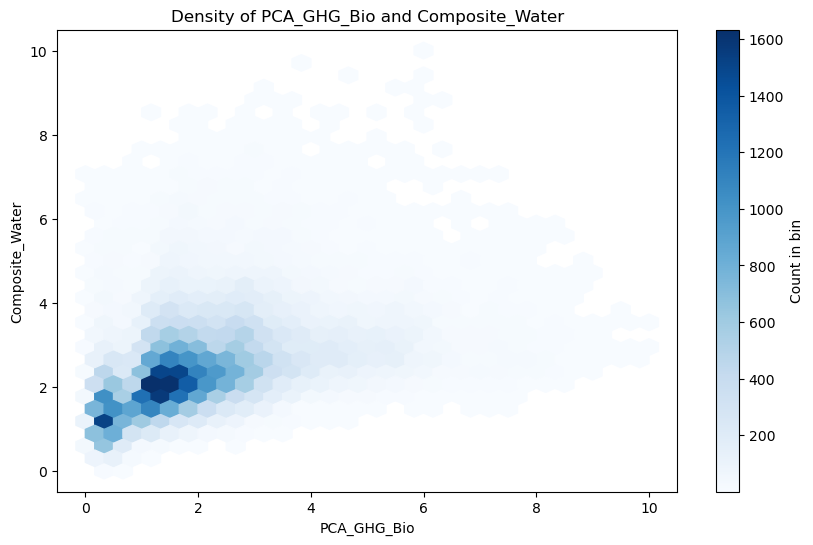

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
df1 = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

# 创建六边形箱图
plt.hexbin(df1['PCA_GHG_Bio'], df1['Composite_Water'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# 添加标题和轴标签
plt.title('Density of PCA_GHG_Bio and Composite_Water')
plt.xlabel('PCA_GHG_Bio')
plt.ylabel('Composite_Water')

plt.show()

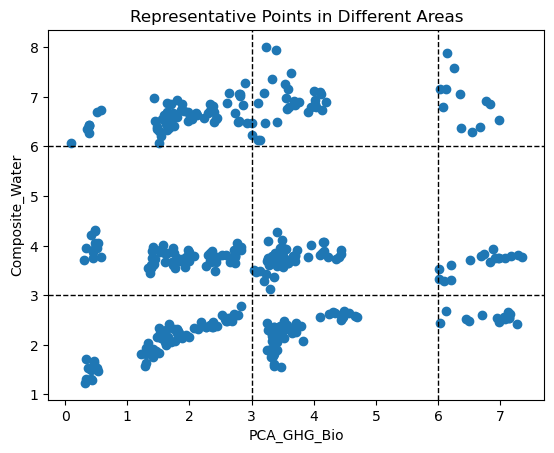

In [92]:
# 定义区域边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 为每个点分配区域
df1['x_bin'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=False)
df1['y_bin'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=False)

# 初始化代表点列表
representative_points = []

# 遍历每个区域
for x in range(3):  # 0 (low), 1 (medium), 2 (high)
    for y in range(3):
        area_subset = df1[(df1['x_bin'] == x) & (df1['y_bin'] == y)]
        for group in area_subset['grouping'].unique():
            group_subset = area_subset[area_subset['grouping'] == group]
            
            if len(group_subset) >= 30:
                sample_points = group_subset.sample(30)
                representative_point = sample_points[['PCA_GHG_Bio', 'Composite_Water']].mean()
            else:
                representative_point = group_subset[['PCA_GHG_Bio', 'Composite_Water']].mean()
            
            representative_point['grouping'] = group  # Add the grouping for the plot
            representative_points.append(representative_point)

# 创建DataFrame
df_representative = pd.DataFrame(representative_points)

# 绘制代表点散点图
plt.scatter(df_representative['PCA_GHG_Bio'], df_representative['Composite_Water'])

# 添加区域分割线
for line in [3, 6]:  # 分割线位置
    plt.axvline(x=line, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=line, color='black', linestyle='--', linewidth=1)

# 添加标题和轴标签
plt.title('Representative Points in Different Areas')
plt.xlabel('PCA_GHG_Bio')
plt.ylabel('Composite_Water')

# 显示图表
plt.show()

In [97]:
# 初始化一个空字典来保存结果
area_stats = {}

# 遍历每个区域，计算每个剩下的分类特征的计数以及均值和标准差
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        
        # 计算性别、饮食组和年龄组的计数
        counts = subset[['sex', 'diet_group', 'age_group']].apply(pd.Series.value_counts).fillna(0).astype(int)
        
        # 计算PCA_GHG_Bio和Composite_Water的均值和标准差
        mean_pca_ghg_bio = subset['PCA_GHG_Bio'].mean()
        std_pca_ghg_bio = subset['PCA_GHG_Bio'].std()
        mean_composite_water = subset['Composite_Water'].mean()
        std_composite_water = subset['Composite_Water'].std()

        # 保存统计数据
        area_stats[area] = {
            'counts': counts,
            'mean_pca_ghg_bio': mean_pca_ghg_bio,
            'std_pca_ghg_bio': std_pca_ghg_bio,
            'mean_composite_water': mean_composite_water,
            'std_composite_water': std_composite_water
        }

# 打印出各个部分的具体个数以及均值和标准差
for area, stats in area_stats.items():
    print(f"Area {area}:")
    print("Counts:")
    print(stats['counts'])
    print("Mean PCA GHG Bio:", stats['mean_pca_ghg_bio'])
    print("Std PCA GHG Bio:", stats['std_pca_ghg_bio'])
    print("Mean Composite Water:", stats['mean_composite_water'])
    print("Std Composite Water:", stats['std_composite_water'])
    print("\n")

Area low_low:
Counts:
           sex  diet_group  age_group
20-29        0           0       7743
30-39        0           0       7661
40-49        0           0       7819
50-59        0           0       7743
60-69        0           0       7578
70-79        0           0       7291
female   23609           0          0
fish         0        8591          0
male     22226           0          0
meat         0        5842          0
meat100      0         763          0
meat50       0        8820          0
vegan        0       11274          0
veggie       0       10545          0
Mean PCA GHG Bio: 1.4180327915348534
Std PCA GHG Bio: 0.7544760786994613
Mean Composite Water: 1.93290799607287
Std Composite Water: 0.5881378379988804


Area low_medium:
Counts:
          sex  diet_group  age_group
20-29       0           0       1925
30-39       0           0       2028
40-49       0           0       1761
50-59       0           0       1835
60-69       0           0       1957
70-79  

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\P

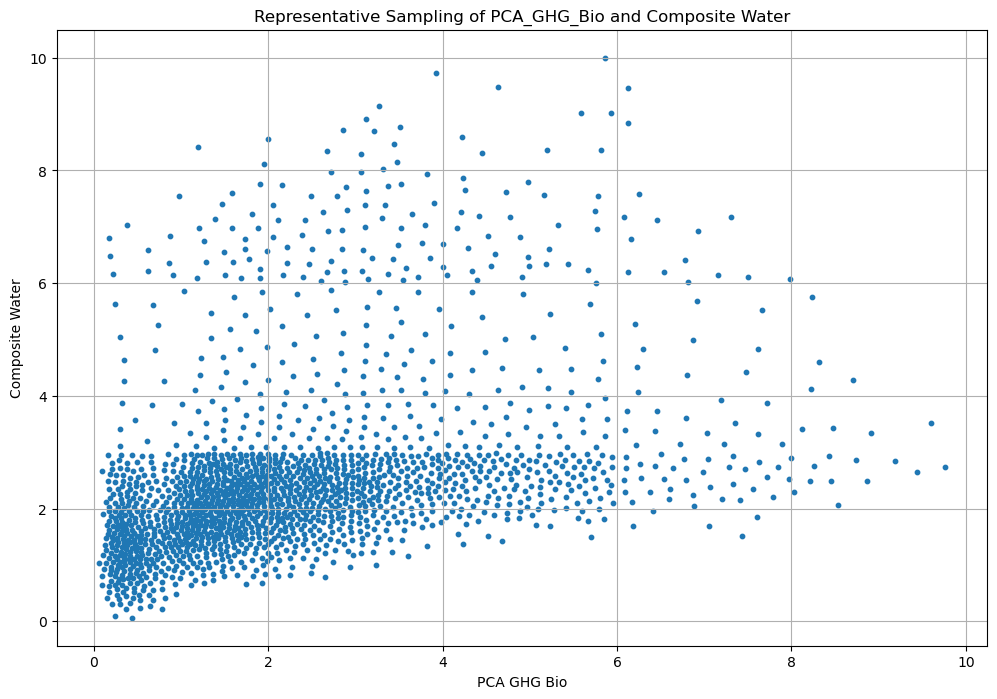

In [119]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 为每个点分配区域
df1['x_bin'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=False)
df1['y_bin'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=False)

# 手动指定每个区域的采样数量
samples_per_area = {(0, 0): 1000, (0, 1): 100, (0, 2): 62, 
                    (1, 0): 300,  (1, 1): 100, (1, 2): 73,
                    (2, 0): 50,  (2, 1): 32, (2, 2): 15}

# 初始化空列表来存储每个区域的代表点
representative_points = []

# 遍历每个区域
for x in range(3):  # 对应 x_bins
    for y in range(3):  # 对应 y_bins
        subset = df1[(df1['x_bin'] == x) & (df1['y_bin'] == y)]
        n_samples = samples_per_area.get((x, y), len(subset))  # 获取每个区域的采样数量，默认使用区域内的点数

        if len(subset) > 0:  # 只有当区域内有数据点时才进行聚类
            kmeans = KMeans(n_clusters=min(len(subset), n_samples), random_state=0).fit(subset[['PCA_GHG_Bio', 'Composite_Water']])
            # 添加聚类中心作为代表点
            centers = kmeans.cluster_centers_
            for center in centers:
                representative_points.append({'PCA_GHG_Bio': center[0], 'Composite_Water': center[1], 'x_bin': x, 'y_bin': y})

# 将代表点转换成DataFrame
df_representative = pd.DataFrame(representative_points)

# 绘制散点图
plt.figure(figsize=(12, 8))
plt.scatter(df_representative['PCA_GHG_Bio'], df_representative['Composite_Water'], s=10)  # s是点的大小
plt.title('Representative Sampling of PCA_GHG_Bio and Composite Water')
plt.xlabel('PCA GHG Bio')
plt.ylabel('Composite Water')
plt.grid(True)
plt.show()



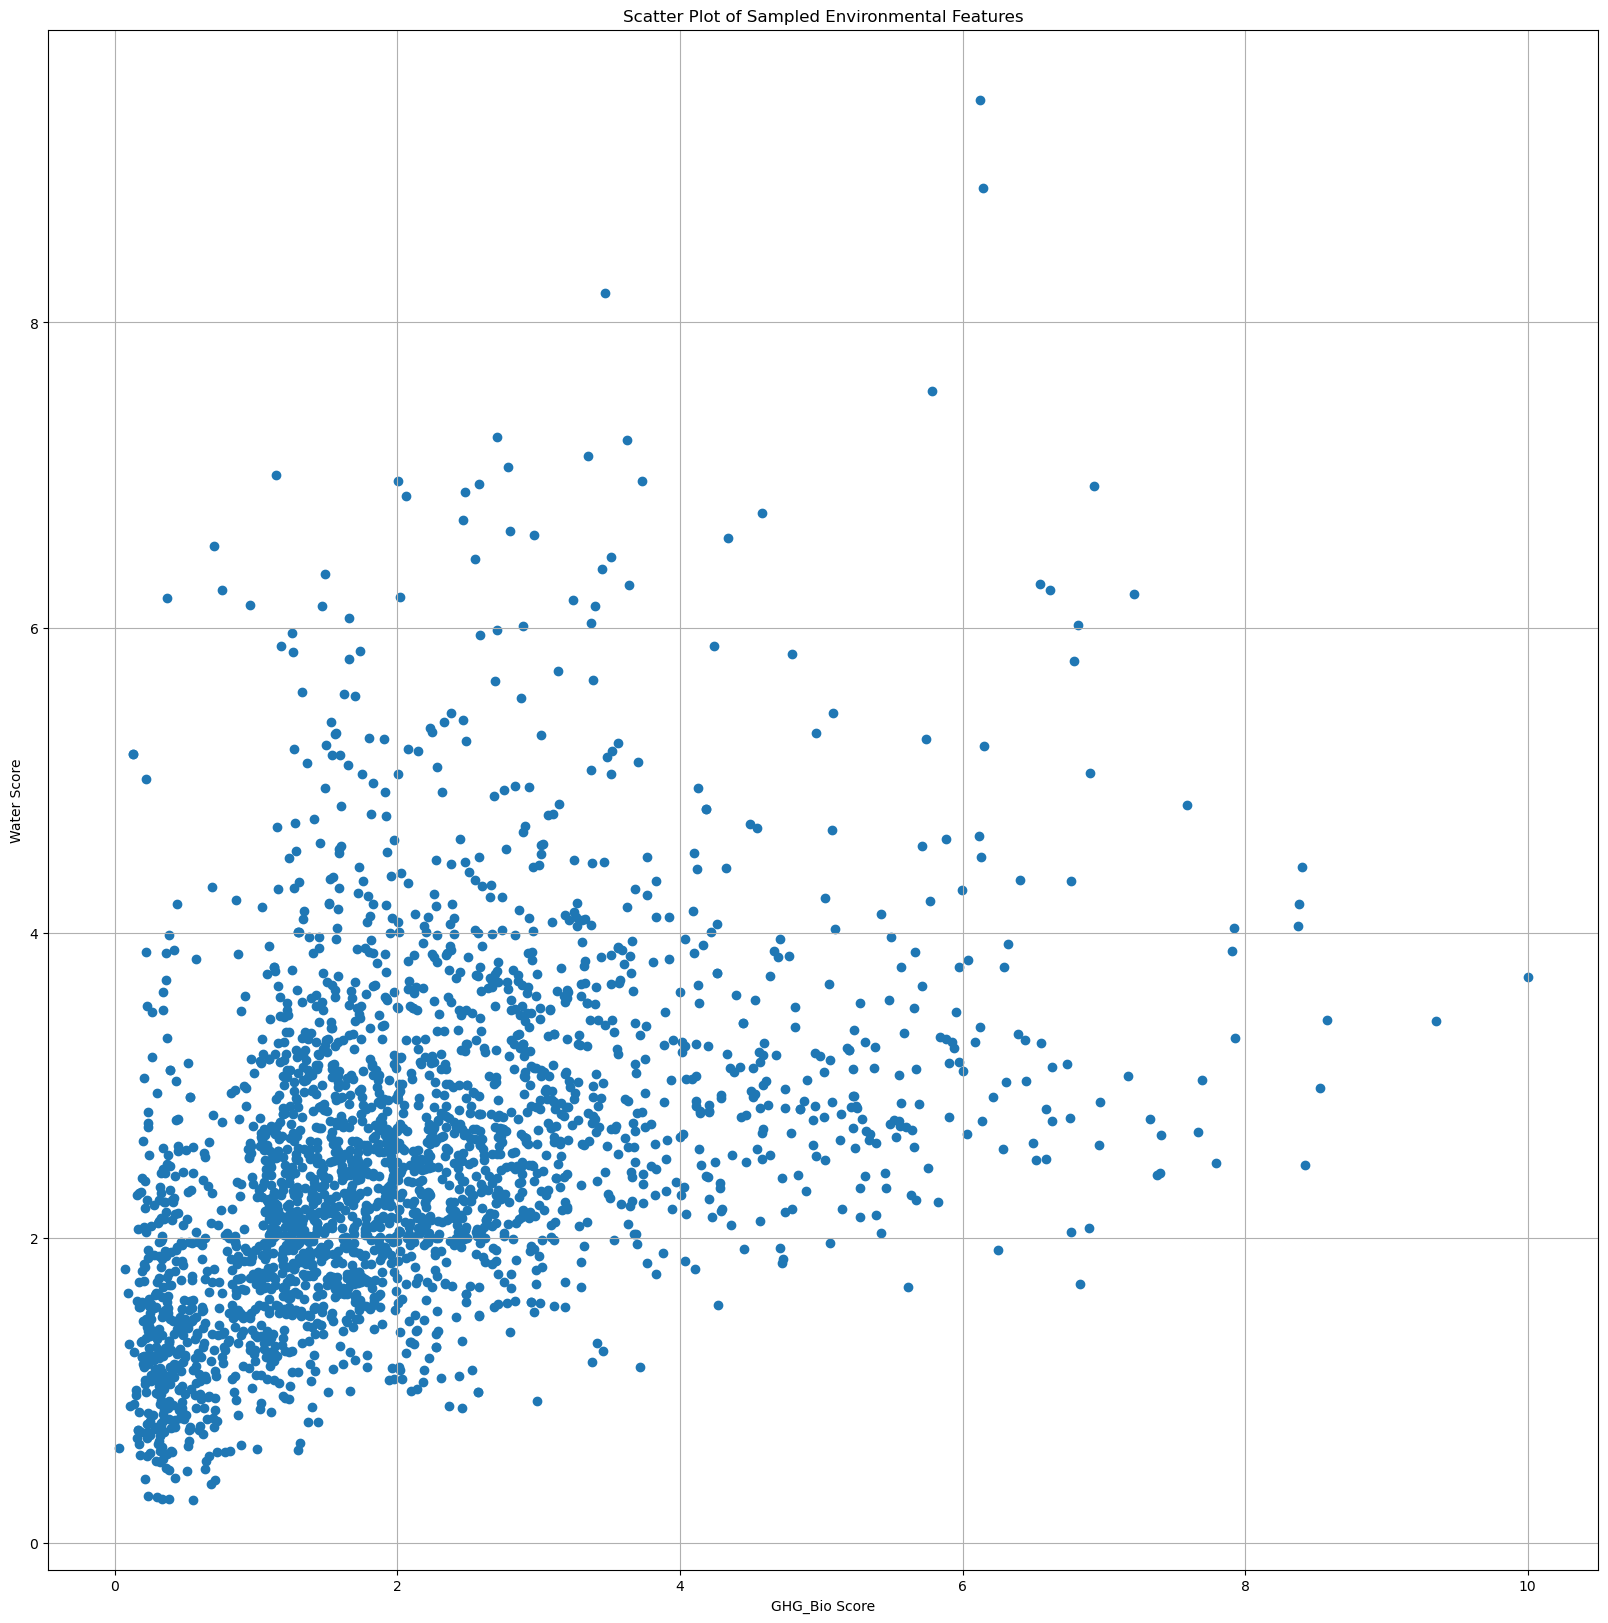

In [153]:
# 设置最小样本数和每个grouping类别要抽取的样本数
min_samples_per_bin = 5
samples_per_group = 35

# 使用groupby和sample对每个区域和grouping进行抽样
# 先确保每个区域至少有min_samples_per_bin个样本
sampled_df = pd.DataFrame()
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        if len(subset) > min_samples_per_bin:
            sampled_subset = subset.sample(n=min_samples_per_bin, random_state=1)
            sampled_df = pd.concat([sampled_df, sampled_subset])
        else:
            sampled_df = pd.concat([sampled_df, subset])

# 然后对剩下的数据进行随机抽样
additional_samples = df1[~df1.index.isin(sampled_df.index)].groupby('grouping').sample(n=samples_per_group, random_state=1, replace=True)

# 合并最初的抽样数据和额外的抽样数据
sampled_df = pd.concat([sampled_df, additional_samples]).reset_index(drop=True)

# 创建一个基础散点图
plt.figure(figsize=(20, 20))
plt.scatter(sampled_df['PCA_GHG_Bio'], sampled_df['Composite_Water'])

# 添加标题和轴标签
plt.title('Scatter Plot of Sampled Environmental Features')
plt.xlabel("GHG_Bio Score")
plt.ylabel('Water Score')
plt.grid(True)

# 显示图表
plt.show()

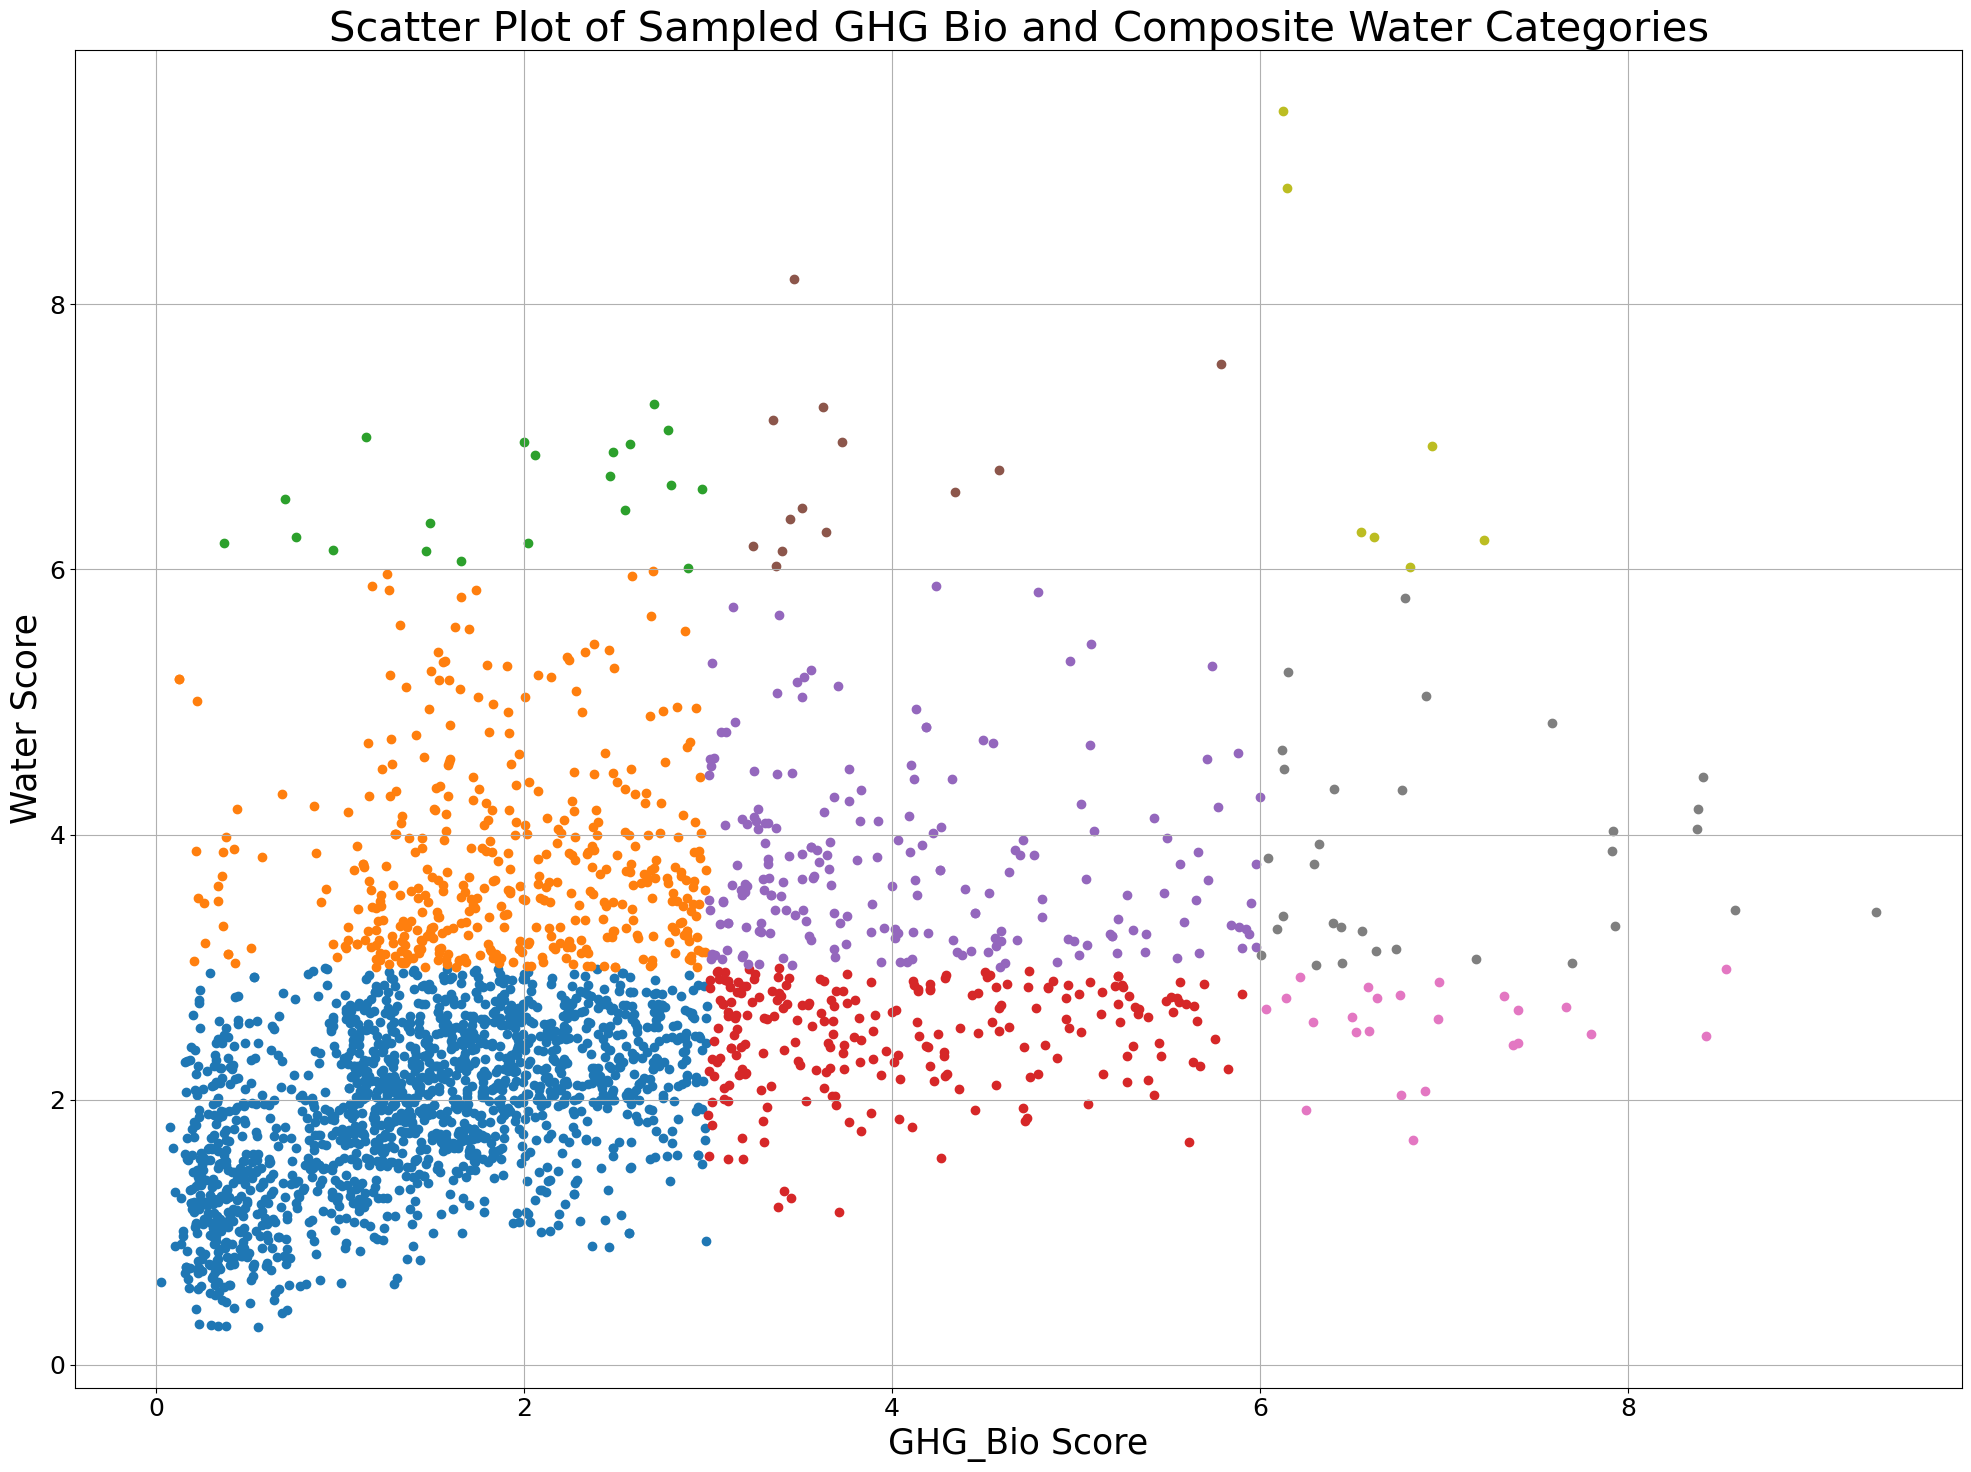

In [180]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
sampled_df['PCA_GHG_Bio_Category'] = pd.cut(sampled_df['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], right=False)
sampled_df['Composite_Water_Category'] = pd.cut(sampled_df['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], right=False)

# 设置字体大小
plt.rcParams.update({'font.size': 16})  # 更改默认的字体大小

# 创建散点图
plt.figure(figsize=(20, 15))
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = sampled_df[(sampled_df['PCA_GHG_Bio_Category'] == x_label) & (sampled_df['Composite_Water_Category'] == y_label)]
        plt.scatter(subset['PCA_GHG_Bio'], subset['Composite_Water'], label=f'GHG Bio: {x_label} / Water: {y_label}')

# 添加标题和标签
plt.title('Scatter Plot of Sampled GHG Bio and Composite Water Categories', fontsize=30)
plt.xlabel('GHG_Bio Score', fontsize=25)
plt.ylabel('Water Score', fontsize=25)

# 设置刻度大小
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True)

# 添加图例，调整图例字体大小
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)

# 调整子图参数或使用tight_layout自动调整，以防止图例和标签被剪切
plt.tight_layout()

# 显示图表
plt.show()

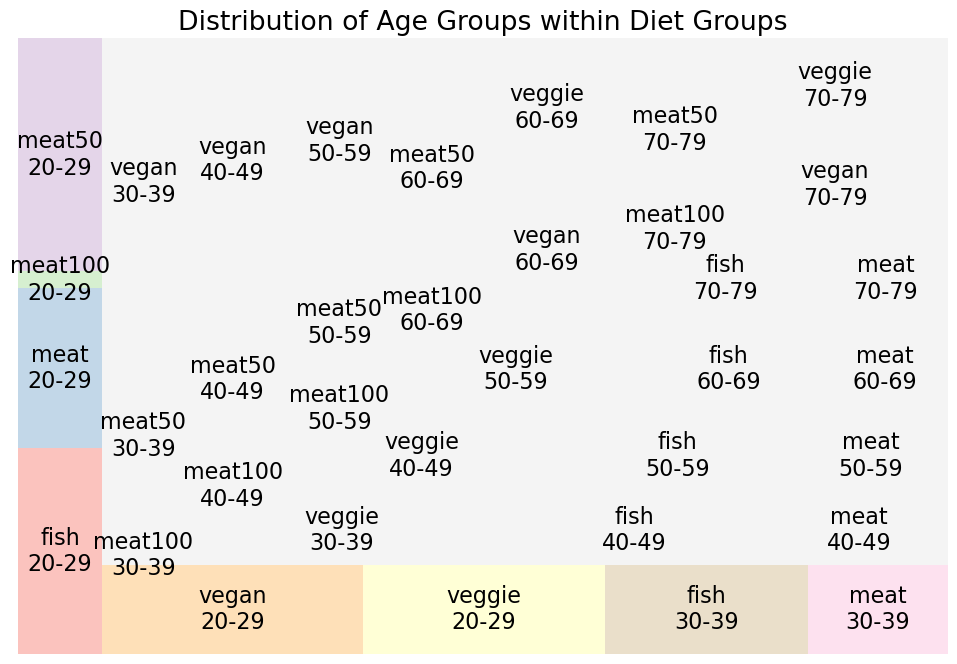

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify  # 用于生成矩形树图

# 假设你已经有了类似上面的DataFrame
data = {
    'age_group': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
    'fish': [1390, 1450, 1506, 1470, 1413, 1366],
    'meat': [1077, 1003, 990, 974, 944, 865],
    'meat100': [116, 128, 151, 137, 133, 102],
    'meat50': [1574, 1443, 1499, 1468, 1445, 1397],
    'vegan': [1864, 1890, 1898, 1916, 1867, 1841],
    'veggie': [1728, 1751, 1776, 1784, 1782, 1725]
}
df = pd.DataFrame(data)

# 重新构建DataFrame以适应矩形树图的数据结构
df = df.set_index('age_group').stack().reset_index()
df.columns = ['age_group', 'diet_group', 'value']

# 创建矩形树图
plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(range(len(df)))
squarify.plot(sizes=df['value'], label=df['diet_group'] + '\n' + df['age_group'], color=colors, alpha=0.8)
plt.title('Distribution of Age Groups within Diet Groups')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [186]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 初始化一个空字典来保存结果
area_diet_age_distribution = {}

# 遍历每个区域，计算每个剩下的分类特征的计数
for i, (x_label, y_label) in enumerate([('low', 'low'), ('low', 'medium'), ('low', 'high'),
                                        ('medium', 'low'), ('medium', 'medium'), ('medium', 'high'),
                                        ('high', 'low'), ('high', 'medium'), ('high', 'high')], start=1):
    area = f'{x_label}_{y_label}'
    subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
    # 按照diet_group进行分组，然后计算每个diet_group下的age_group分布
    diet_age_group_distribution = subset.groupby('diet_group')['age_group'].value_counts().unstack(fill_value=0)
    area_diet_age_distribution[area] = diet_age_group_distribution
    
    # 准备数据以保存到CSV
    df_to_save = diet_age_group_distribution.stack().reset_index()
    df_to_save.columns = ['diet_group', 'age_group', 'value']
    
    # 保存到CSV文件
    df_to_save.to_csv(f'df_area{i}.csv', index=False)

# 通知保存完成
print("All area distribution data have been saved to CSV files.")

All area distribution data have been saved to CSV files.
